## Newmont Golden Ridge Data Analysis

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv



#### Data Loading

In [3]:
# Load environment variables from .env file
load_dotenv()

# Path to the CSV file
data_path = "../data/newmont_golden_ridge_dataset.csv"

# load database configurations
database = os.getenv("DB_DATABASE")
username = os.getenv("DB_USERNAME")
password = os.getenv("DB_PASSWORD")
host_name = os.getenv("DB_HOST") 
port = os.getenv("DB_PORT")


In [4]:
# Database connection string
connection_string = f"mysql+mysqlconnector://{username}:{password}@{host_name}:{port}/{database}"

# Create database engine
engine = create_engine(connection_string)


In [5]:
# SQL query to fetch data from the table
query = "SELECT * FROM newmont_golden_ridge_dataset"
# load the dataset
df = pd.read_sql(query,engine)


In [6]:
# preview the data
df.head()

,Name,Address,Department,Job Title,Location,Date Of Birth,Age,Salary,Equipment Id,Equipment Type,...,Transaction Date,Transaction Amount,Profit,Gold Price,Production Tonnage,Production Cost,Revenue,Preferred App,Preferred Website,Email
0,Mary White,39506 Roberta Stravenue Suite 373\nPort Marvin...,Safety,Supervisor,Plant,1987-08-31,36,681262.17,b9a8761a,Excavator,...,2023-12-20,843.99,-1247.14,1807.63,175.22,317980.07,316732.93,iOS App,No,prollins@example.net
1,Lori Walker,"410 Simmons Ports\nNew Joel, FM 92349",Mining,Supervisor,Plant,1979-01-20,45,302755.64,753bd09f,Dump Truck,...,2023-11-13,252.43,932167.30,1685.64,670.84,198627.44,1130794.74,Android App,Yes,xscott@example.com
2,Melissa Stephens,"495 Robert Vista\nRachelberg, MH 93548",Safety,Operator,Plant,1938-07-02,85,854544.71,a49d3fed,Drill Rig,...,2024-03-01,870.73,430795.35,1727.28,404.25,267457.59,698252.94,Android App,No,kristen59@example.com
3,Laura Padilla,"457 Tami Island\nNorth Patricia, OH 51049",Mining,Supervisor,Office,1985-06-04,38,522573.86,cffd1fd7,Dump Truck,...,2023-05-25,491.76,688707.65,1534.55,517.95,106112.52,794820.17,iOS App,Yes,erintorres@example.net
4,Joseph Brown,"769 Wendy Well Apt. 832\nFigueroaland, DE 28276",Maintenance,Supervisor,Pit,1987-03-10,37,359750.84,1be28bef,Excavator,...,2024-01-30,199.57,-60806.00,1747.00,145.06,314225.82,253419.82,iOS App,Yes,matthew89@example.com


## Business Questions
1. How is the rise of gold price over the years ? 
2. What is the distribution of transactions per year?
3. Which month in the year 2023 had the most most revenue?
4. What is the average salary per department?
5. Which department generated the most revenues for the past year?
6. What is the most prefered app for communication?
7. What is the average gold price per year?
8. How many tons of gold were produced per year 2023?
9. What is the average salary based on the job_title?
10. Which location in the company has the most employees?


In [7]:
# check the last five rows of the data
df.tail()

,Name,Address,Department,Job Title,Location,Date Of Birth,Age,Salary,Equipment Id,Equipment Type,...,Transaction Date,Transaction Amount,Profit,Gold Price,Production Tonnage,Production Cost,Revenue,Preferred App,Preferred Website,Email
99995,Steven Porter,"100 David Gateway\nNorth Brittany, ME 11244",Safety,Supervisor,Pit,1981-06-08,42,284856.92,502fb4f0,Drill Rig,...,2024-02-02,932.18,1317784.12,1710.55,844.99,127613.52,1445397.64,iOS App,No,xjones@example.org
99996,Rachel Jacobs,"9741 Matthews Ford\nByrdmouth, MT 85577",Maintenance,Supervisor,Office,1964-10-15,59,114076.85,52c020ed,Excavator,...,2023-10-25,999.58,1393917.93,1832.78,883.87,226021.33,1619939.26,Android App,No,melissa45@example.com
99997,Christine Harmon,"41340 Walker Ports\nGrimeshaven, MN 34987",Maintenance,Operator,Office,1927-06-03,96,631458.64,334c4f74,Excavator,...,2023-09-05,467.03,953901.20,1540.85,840.01,340428.21,1294329.41,iOS App,No,sharon36@example.net
99998,Michael Bryant,Unit 5465 Box 7755\nDPO AA 54641,Maintenance,Supervisor,Office,1937-02-10,87,686055.62,8395e2b5,Drill Rig,...,2023-12-04,89.21,225282.25,1537.86,410.53,406055.42,631337.67,iOS App,No,ugaines@example.com
99999,John Yates,"282 Brown Square\nStarkbury, VT 54919",Safety,Supervisor,Office,1995-01-02,29,148931.12,3481237d,Excavator,...,2023-06-19,397.26,517863.86,1679.87,540.61,390290.66,908154.52,iOS App,No,monicamorrison@example.net


## Question 1
1. How is the rise of gold price over the years ? 

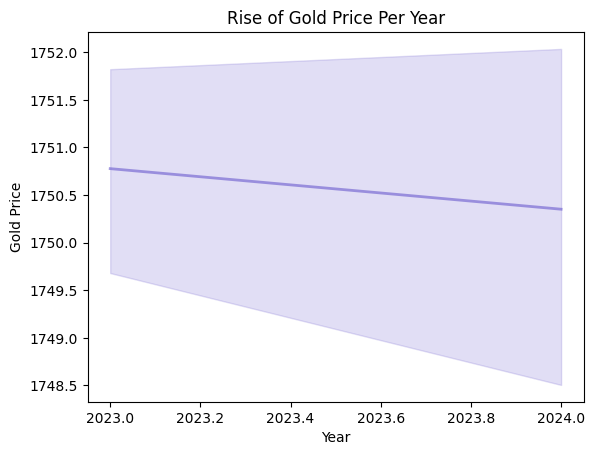

In [8]:
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"])
x = df["Transaction Date"].dt.year
y = df["Gold Price"]

plt.title("Rise of Gold Price Per Year")
plt.xlabel("Year")
plt.ylabel("Gold Price")

# Using Seaborn's lineplot
sns.lineplot(x=x, y=y, color="Slateblue", alpha=0.6, linewidth=2)

plt.show()

## Question 2
What is the distribution of transactions per year?


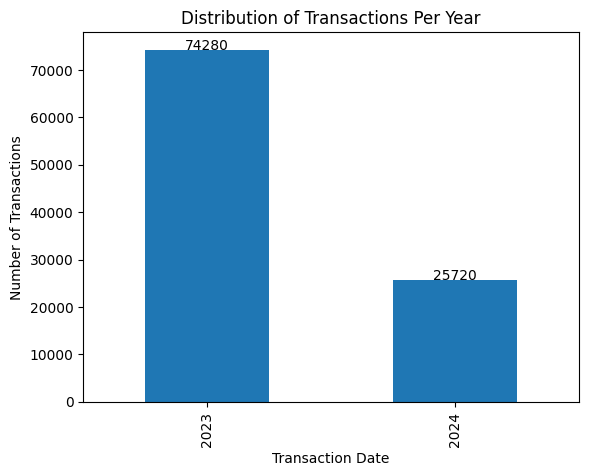

In [9]:
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"])
transaction_year = df["Transaction Date"].dt.year
transactions_per_year = df.groupby(by=transaction_year)["Salary"].count()
plt.title("Distribution of Transactions Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Transactions")
bars = transactions_per_year.plot(kind="bar")

# Adding labels to the bars
for bar in bars.patches:
    # Get the height of the bar
    height = bar.get_height()
    # Add text annotation on top of the bar with the height value
    bars.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{height}", ha='center')

plt.show()


## Question 3
3. Which month in the year 2023 had the most most revenue?

<Axes: xlabel='Transaction Date', ylabel='Revenue'>

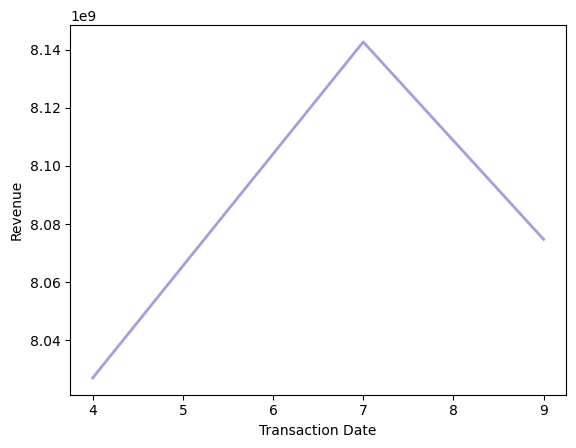

In [10]:
year_2023 = df[df["Transaction Date"].dt.year == 2023]
month_2023 = year_2023["Transaction Date"].dt.month
revenue_2023 = year_2023.groupby(by=month_2023)["Revenue"].sum()
revenue_2023

# visualize the data
sns.lineplot(x=month_2023,y = revenue_2023,color="Slateblue", alpha=0.6, linewidth=2)


#### Question 4
4. What is the average salary per department?

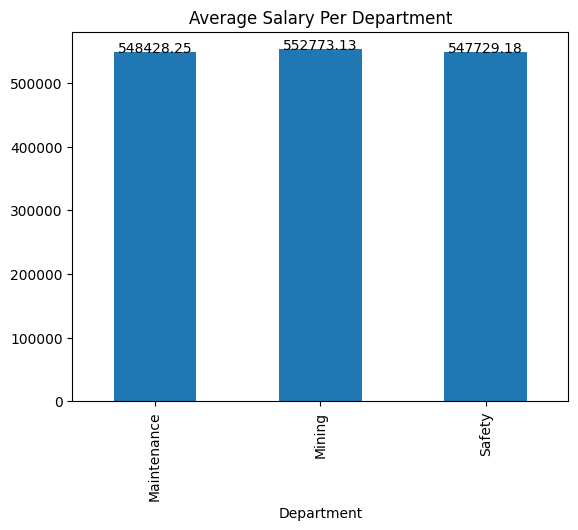

In [15]:
average_department_salary = df.groupby("Department")["Salary"].mean().round(2)
bars = average_department_salary.plot(kind="bar")
# Adding labels to the bars
for bar in bars.patches:
    # Get the height of the bar
    height = bar.get_height()
    # Add text annotation on top of the bar with the height value
    bars.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{height}", ha='center')
plt.title("Average Salary Per Department")
plt.show()


#### Question 5
Which department generated the most revenues for the past year?

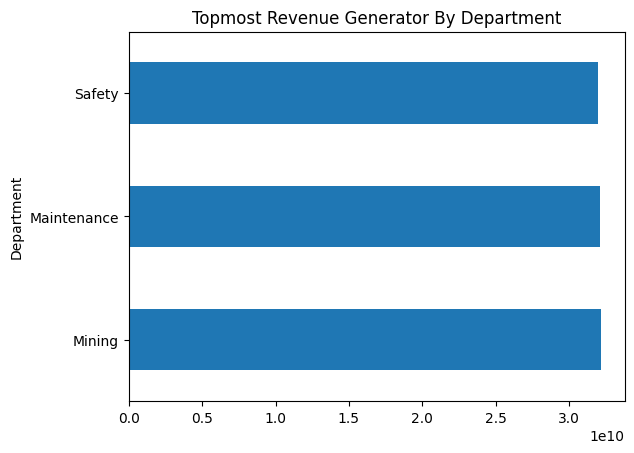

In [18]:
topmost_revenue_generator = df.groupby("Department")["Revenue"].sum().sort_values(ascending=False).round(2)
bars=topmost_revenue_generator.plot(kind="barh")
plt.title("Topmost Revenue Generator By Department")
plt.show()

In [19]:
df.columns

Index(['Name', 'Address', 'Department', 'Job Title', 'Location',
       'Date Of Birth', 'Age', 'Salary', 'Equipment Id', 'Equipment Type',
       'Equipment Status', 'Maintenance Cost', 'Safety Incident',
       'Environmental Incident', 'Community Relations', 'Transaction Date',
       'Transaction Amount', 'Profit', 'Gold Price', 'Production Tonnage',
       'Production Cost', 'Revenue', 'Preferred App', 'Preferred Website',
       'Email'],
      dtype='object')

#### Question 6
What is the most preferred app for communication?

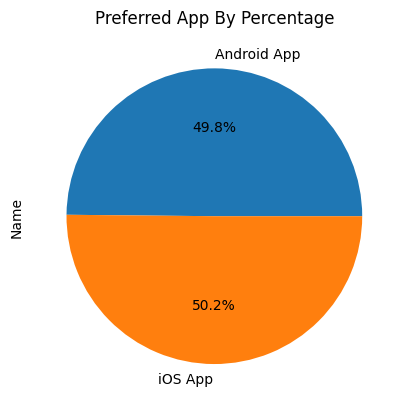

In [32]:
plt.title("Preferred App By Percentage")
preferred_app = df.groupby("Preferred App")["Name"].count()
percentage_by_app = (preferred_app / len(df)) * 100
pie_chart = percentage_by_app.plot(kind="pie", autopct='%1.1f%%')

plt.show()

 #### Question 7
 What is the average gold price per year?

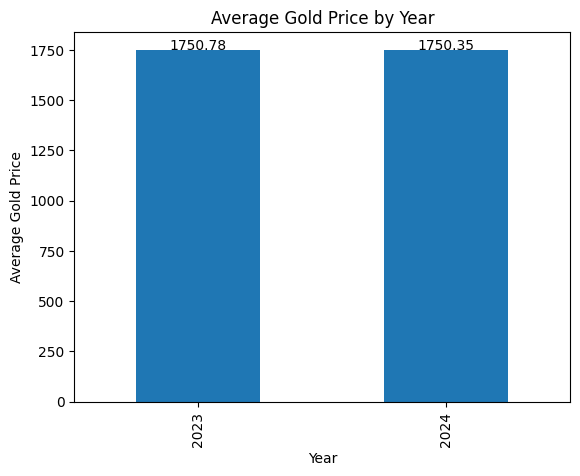

In [40]:
year = df["Transaction Date"].dt.year
average_gold_price = df.groupby(year)["Gold Price"].mean().round(2)
bars = average_gold_price.plot(kind="bar")

# Adding labels to the bars
for bar in bars.patches:
    # Get the height of the bar
    height = bar.get_height()
    # Add text annotation on top of the bar with the height value
    bars.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{height}", ha='center')
plt.xlabel("Year")
plt.ylabel("Average Gold Price")
plt.title("Average Gold Price by Year")
plt.show()

#### Questiom 8 
How many tons of gold were produced in the year 2023?

In [45]:
year_2023 = df[df["Transaction Date"].dt.year == 2023]
production_tonnage_2023 = year_2023.groupby(year_2023["Transaction Date"].dt.month)["Production Tonnage"].sum()
total = sum(production_tonnage_2023)
print(f"The number of tons of gold produced in the year 2023 were {total} tons") 

The number of tons of gold produced in the year 2023 were 40856514.17 tons


#### Question 9
What is the average salary based on the job_title?

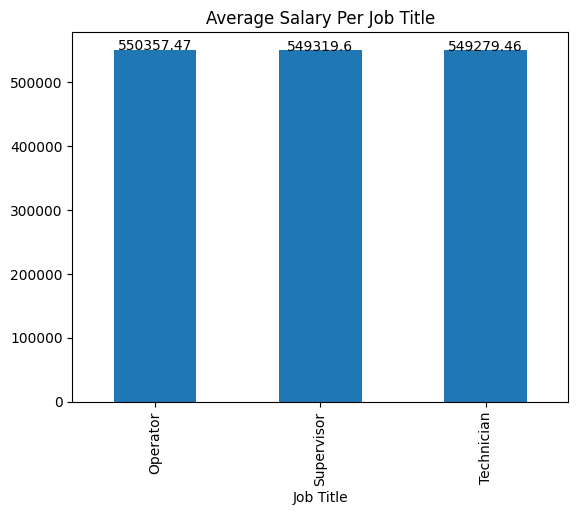

In [46]:
average_department_salary = df.groupby("Job Title")["Salary"].mean().round(2)
bars = average_department_salary.plot(kind="bar")
# Adding labels to the bars
for bar in bars.patches:
    # Get the height of the bar
    height = bar.get_height()
    # Add text annotation on top of the bar with the height value
    bars.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{height}", ha='center')
plt.title("Average Salary Per Job Title")
plt.show()

#### Question 10
 Which location in the company has the most employees?

In [47]:
df.groupby("Location")["Name"].count().round()

Location
Office    33377
Pit       33382
Plant     33241
Name: Name, dtype: int64